In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
car_data = pd.read_csv("toyota.csv")

In [3]:
car_data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [4]:
car_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
car_data[car_data.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
397,RAV4,2016,17495,Automatic,58100,Hybrid,20,55.4,2.5
398,RAV4,2017,16295,Manual,34633,Diesel,125,60.1,2.0
446,RAV4,2014,10999,Manual,57942,Diesel,145,53.0,2.0
459,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
460,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
764,RAV4,2016,18795,Automatic,57000,Hybrid,20,55.4,2.5
1178,Yaris,2016,10495,Automatic,33705,Hybrid,0,86.0,1.5
1414,Yaris,2016,9495,Automatic,26191,Petrol,30,58.0,1.3


In [7]:
car_data.drop_duplicates(inplace=True)

In [8]:
car_data.model.value_counts()

 Yaris            2117
 Aygo             1940
 Auris             709
 C-HR              479
 RAV4              467
 Corolla           265
 Prius             232
 Verso             114
 Avensis           114
 Hilux              85
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [9]:
car_data.transmission.value_counts()

Manual       3793
Automatic    2651
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [10]:
car_data[car_data['transmission'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2458,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5


In [11]:
car_data[car_data['model'] == 'Yaris']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [12]:
car_data.groupby("model")["transmission"].value_counts()

model           transmission
 Auris          Automatic        527
                Manual           180
                Semi-Auto          2
 Avensis        Manual            94
                Automatic         18
                Semi-Auto          2
 Aygo           Manual          1672
                Semi-Auto        157
                Automatic        111
 C-HR           Automatic        394
                Manual            85
 Camry          Automatic         11
 Corolla        Automatic        185
                Manual            80
 GT86           Manual            61
                Automatic          6
                Semi-Auto          6
 Hilux          Manual            44
                Automatic         41
 IQ             Manual             5
                Automatic          3
 Land Cruiser   Semi-Auto         27
                Automatic         21
                Manual             3
 PROACE VERSO   Automatic          9
                Manual             6
 Prius   

In [13]:
car_data.transmission.replace("Other", "Manual", inplace=True)

In [14]:
car_data[car_data['transmission'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [15]:
car_data[car_data['fuelType'] == 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
73,Corolla,2019,22500,Automatic,8006,Other,140,85.6,1.8
307,Corolla,2020,25990,Automatic,1112,Other,135,53.3,2.0
340,RAV4,2019,30500,Automatic,13326,Other,140,51.1,2.5
768,RAV4,2017,18000,Automatic,26972,Other,205,43.5,2.0
769,RAV4,2017,20000,Automatic,4909,Other,200,43.5,2.0
...,...,...,...,...,...,...,...,...,...
6315,Prius,2013,17995,Automatic,58852,Other,10,64.2,1.8
6317,Prius,2015,21795,Automatic,28001,Other,10,64.2,1.8
6534,Verso,2016,16700,Automatic,9444,Other,160,43.5,1.8
6537,Verso,2017,14800,Automatic,33989,Other,165,43.5,1.8


In [16]:
car_data.groupby("fuelType")['model'].value_counts()

fuelType  model         
Diesel     RAV4              176
           Hilux              85
           Avensis            75
           Land Cruiser       51
           Auris              41
           Verso              29
           Yaris              22
           PROACE VERSO       15
           Corolla             1
           Urban Cruiser       1
Hybrid     Yaris             556
           Auris             498
           C-HR              352
           RAV4              228
           Prius             214
           Corolla           181
           Camry              11
Other      Aygo               59
           Prius              18
           Yaris              10
           C-HR                7
           RAV4                5
           Corolla             2
           Verso               2
           Auris               1
           Supra               1
Petrol     Aygo             1881
           Yaris            1529
           Auris             169
           C-HR   

In [17]:
car_data[(car_data["fuelType"] == 'Other' ) & (car_data["model"] == 'Aygo')].count()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [18]:
label_encoding = preprocessing.LabelEncoder()

In [19]:
car_data["enc_model"] = label_encoding.fit_transform(car_data.model)
car_data["enc_transmission"] = label_encoding.fit_transform(car_data.transmission)
car_data["enc_fuelType"] = label_encoding.fit_transform(car_data.fuelType)

<AxesSubplot:>

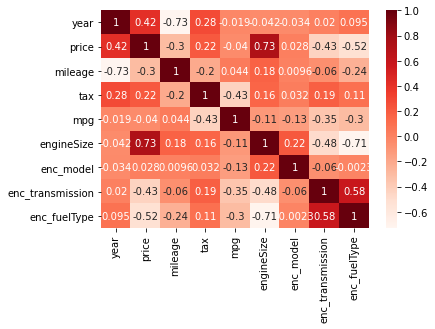

In [20]:
sns.heatmap(car_data.corr(),  cmap="Reds", annot=True, linewidths=0)

In [21]:
x = car_data.drop(['mpg', 'enc_model', 'model', 'transmission', 'fuelType'], axis=1)
y = car_data.price

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 4, test_size = 0.3 )

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(x_train, y_train)

LinearRegression()

In [25]:
y_predict = regression.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

1.0

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict)

9.535895512747274e-23

In [28]:
regression.predict([[2017, 7695, 21844, 145, 1.0, 1, 3]])

array([7695.])

In [32]:
y_test.shape

(2010,)

In [31]:
y_predict.shape

(2010,)